Start By Importing all th needed libraries for this project.

In [4]:
# import the needed pacages for the training
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, InceptionV3, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout


# Data Paths 
Set the path for the data.

In [27]:
train_dir = './chest_xray/train'
val_dir = './chest_xray/val'
test_dir = './chest_xray/test'

# Data Augmentation and Preprocessing
Make sure to set the parameters for the data augmentation for the training.

In [6]:
# Data Augmentation and Preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

# scale the images

In [7]:
# scale the images
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load Train Images
Load the train images with the resize and batch size, also with the class mode as binary. 


In [8]:
# Load images from train images
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 5216 images belonging to 2 classes.


# load the Validation Data 


In [9]:
# get the valdation images
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 16 images belonging to 2 classes.


# load test images


In [10]:
# get the testing images loaded in to the system'
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

Found 624 images belonging to 2 classes.


# load the Pre Trained Model (VGG16) 
Load the Pre Trained Model. Make sure to exclude the last layer. of the model.


In [11]:
# Load VGG16 without the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 86s 1us/step


# Add the new layers and compile the model
Add the new layers for fine-tuning, and compile the model. This will take a few minutes and it allows us to fine-tune our model to achieve better results and accuracy.



In [12]:
# layers for fine-tuning
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

In [13]:
#  final model
model = Model(inputs=base_model.input, outputs=predictions)

# compile the model and fit the model


In [14]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=2,
    verbose=1
)

/home/codename/anaconda3/envs/env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/2


2024-10-27 04:46:39.866790: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-10-27 04:46:40.633126: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2024-10-27 04:46:43.652648: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 102760448 exceeds 10% of free system memory.
2024-10-27 04:46:43.859912: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.
2024-10-27 04:46:45.010105: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 205520896 exceeds 10% of free system memory.


163/163 ━━━━━━━━━━━━━━━━━━━━ 0s 29s/step - accuracy: 0.8070 - loss: 0.4240 

/home/codename/anaconda3/envs/env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


163/163 ━━━━━━━━━━━━━━━━━━━━ 4752s 29s/step - accuracy: 0.8074 - loss: 0.4234 - val_accuracy: 0.7500 - val_loss: 0.7360
Epoch 2/2
163/163 ━━━━━━━━━━━━━━━━━━━━ 2043s 13s/step - accuracy: 0.9167 - loss: 0.2091 - val_accuracy: 0.7500 - val_loss: 0.5551


# Model Evaluation

### Evaluate on Test Set:

In [15]:
# Evaluating he Vgg16 Model first

test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Accuracy VGG16 Mode:  {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 238s 12s/step - accuracy: 0.8745 - loss: 0.3172
Test Accuracy VGG16 Mode:  0.8750, Test Loss: 0.3009


## Detailed Performance Metrics

In [2]:
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
# Predict on test data Vgg16
test_preds = model.predict(test_generator)
test_preds = (test_preds > 0.5).astype(int)

# Get true labels
true_labels = test_generator.classes

# Classification report
print(classification_report(true_labels, test_preds, target_names=['Normal', 'Pneumonia']))

## Results Visualization

1. VGG16

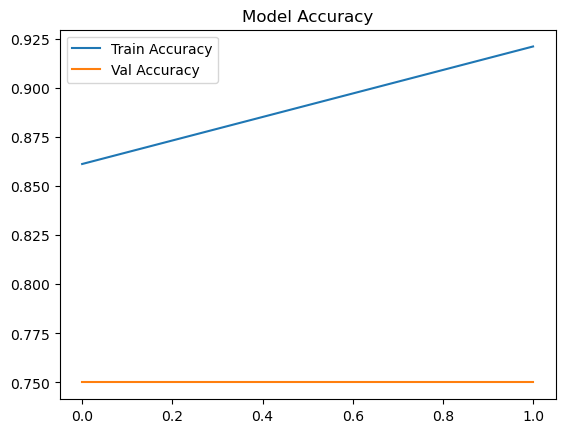

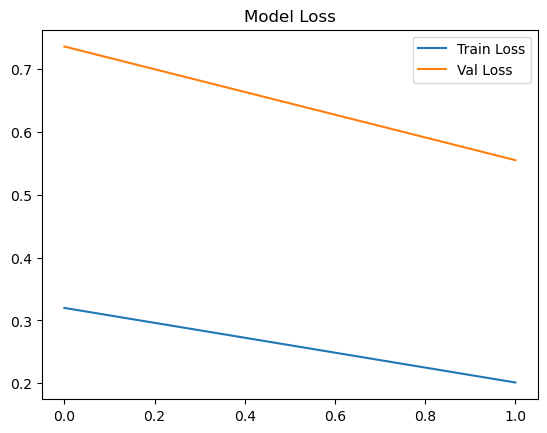

In [18]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

## Test the Model

In [38]:
import cv2
from matplotlib import pyplot as plt

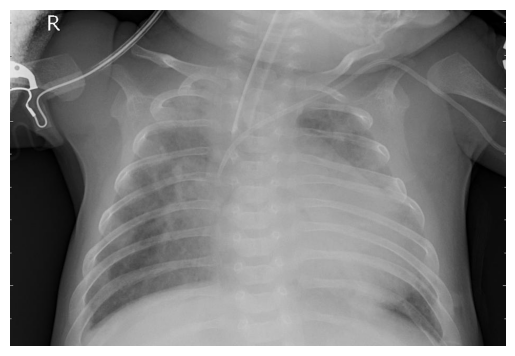

In [47]:
image = 'chest_xray/test/PNEUMONIA/person1_virus_6.jpeg'
image = cv2.imread(image)
plt.imshow(image)
plt.axis(False)
plt.show()

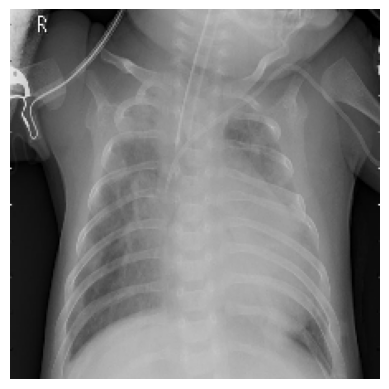

In [48]:
resize = tf.image.resize(image, (224,224))
plt.imshow(resize.numpy().astype(int))
plt.axis(False)
plt.show()

## Make Prediction

In [49]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


In [50]:
yhat

array([[0.97209316]], dtype=float32)

## Print Prediction

In [51]:
if yhat > 0.5: 
    print(f'Predicted as has Pneumonia')
else:
    print(f'Predicted as Normal')

Predicted as has Pneumonia


## Save the VGG16 model

In [52]:
import os
model.save(os.path.join('models', 'vgg16_pneumonia.h5'))